<a href="https://colab.research.google.com/github/Nisjain120/Stock_Historical/blob/main/stockmarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


40.0
     0    MA
0   10   NaN
1   20   NaN
2   30   NaN
3   40   NaN
4   50  30.0
5   60  40.0
6   70  50.0
7   80  60.0
8   90  70.0
9  100  80.0
2004 0
2005 0
2006 0
2007 72
2008 245
2009 241
2010 250
2011 242
2012 242
2013 247
2014 240
2015 244
2016 244
2017 248
2018 245
2019 241
2020 250
2021 248
2022 248
2023 245
2024 246
Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2905/2905 ━━━━━━━━━━━━━━━━━━━━ 274s 92ms/step - loss: 8.7255e-04
Epoch 2/2
2905/2905 ━━━━━━━━━━━━━━━━━━━━ 322s 93ms/step - loss: 9.0302e-05


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step
RMSE: 514.3758541447454


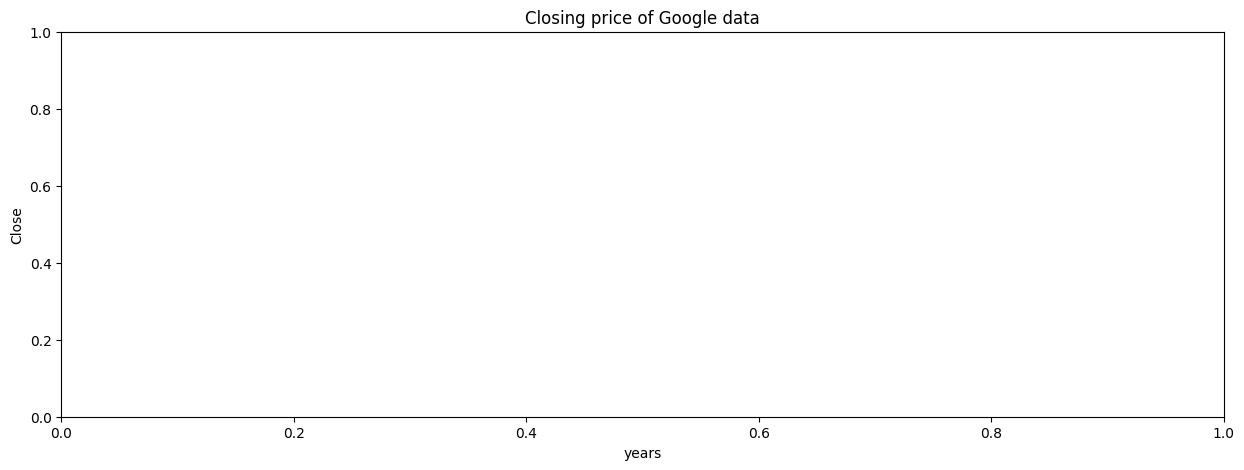

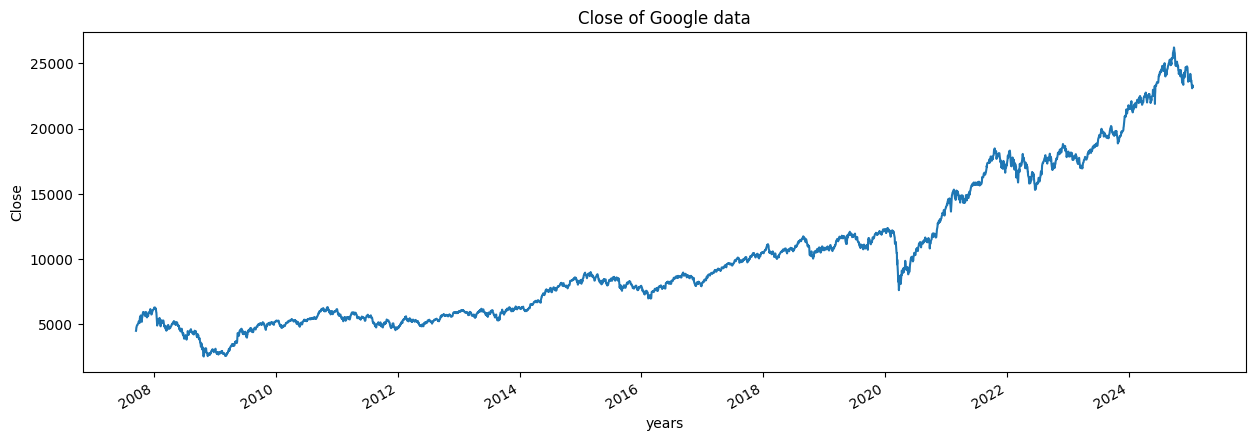

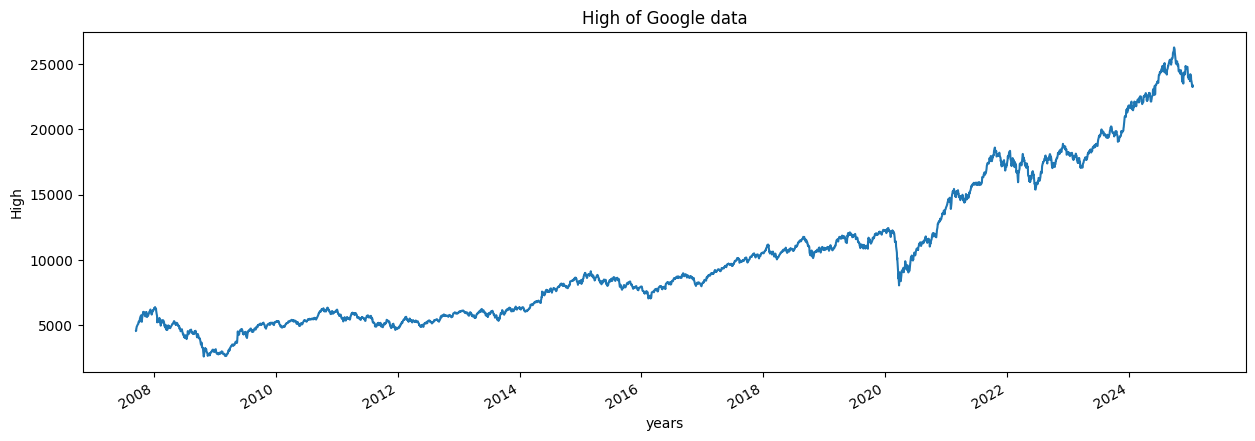

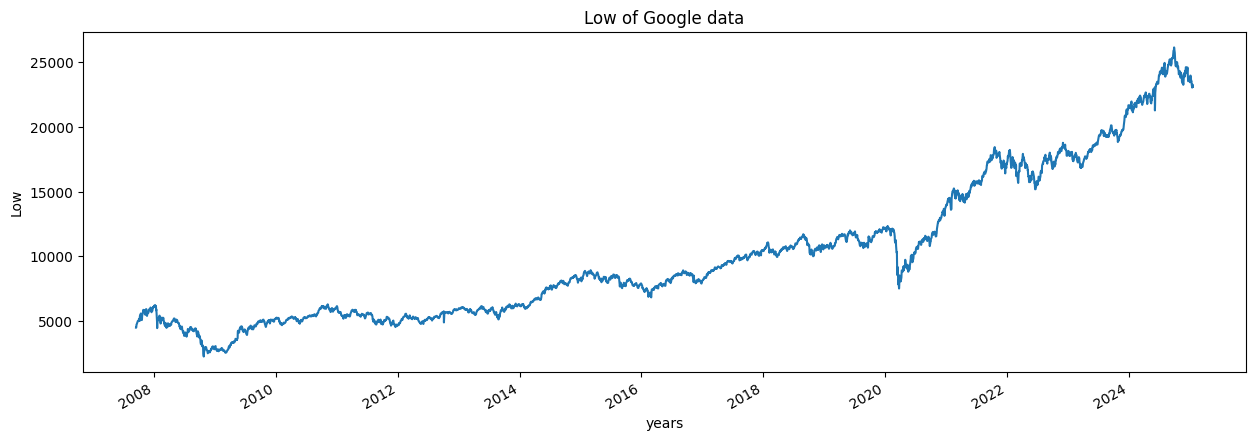

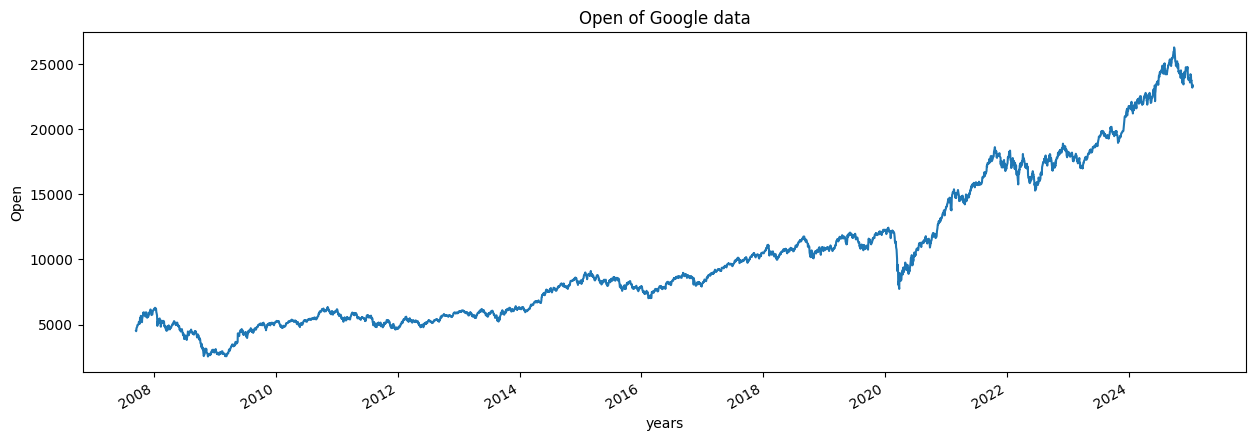

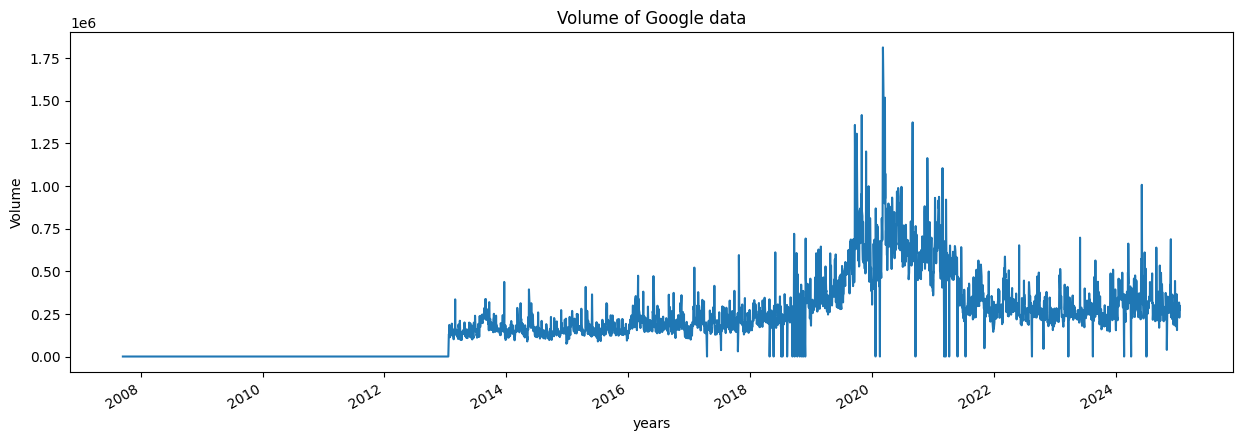

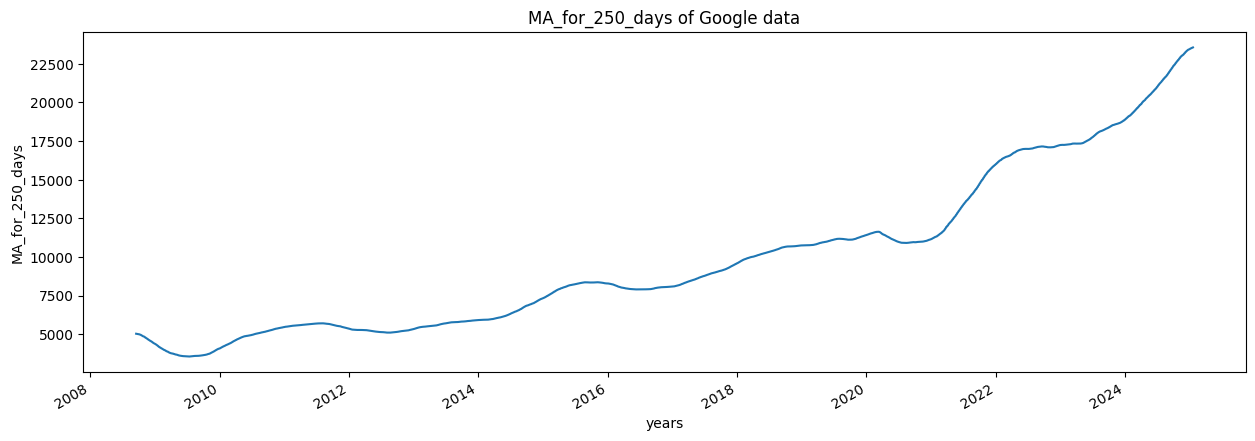

<Figure size 640x480 with 0 Axes>

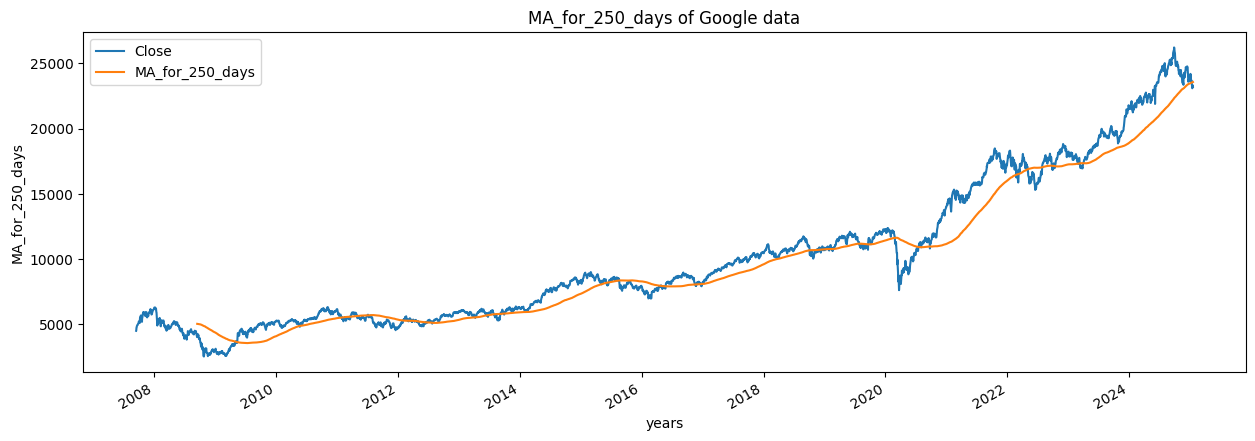

<Figure size 640x480 with 0 Axes>

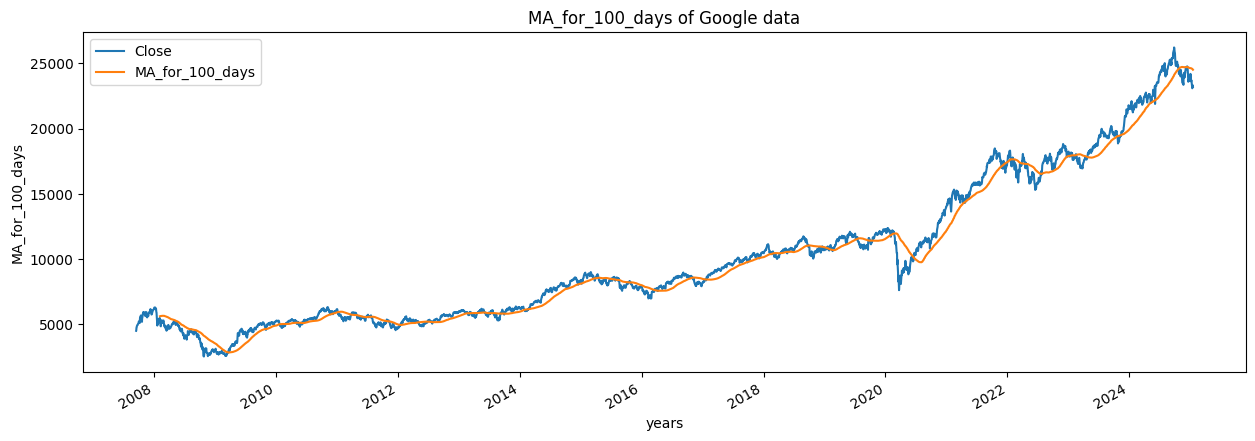

<Figure size 640x480 with 0 Axes>

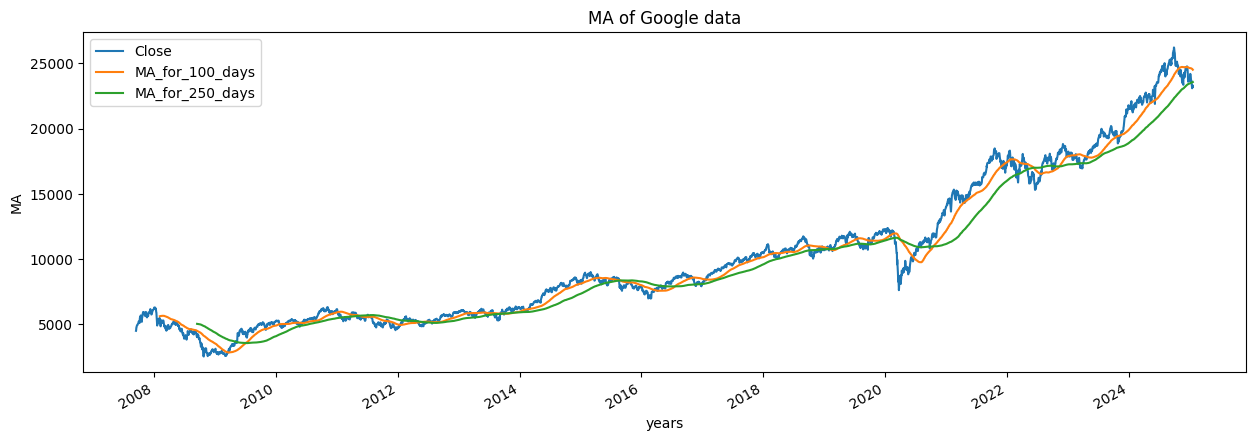

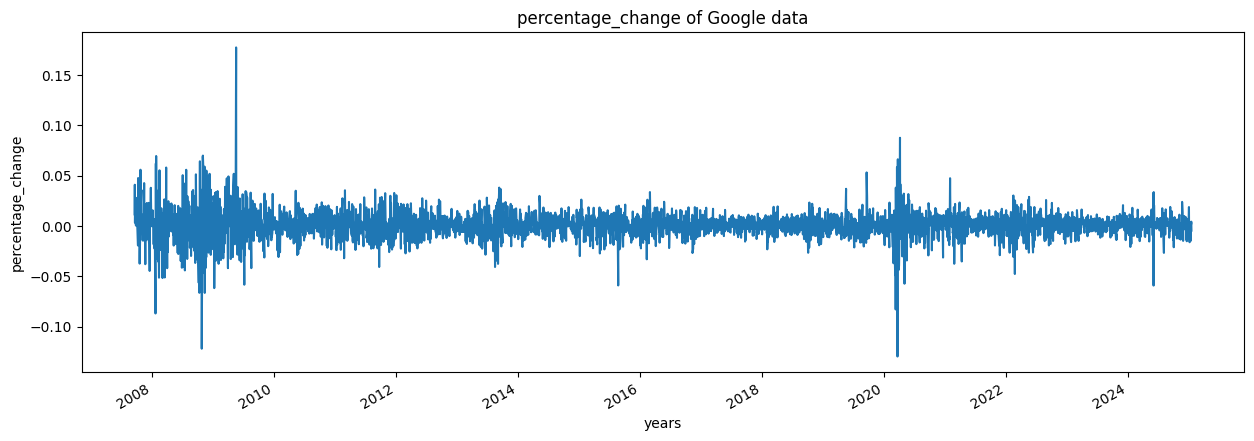

<Figure size 640x480 with 0 Axes>

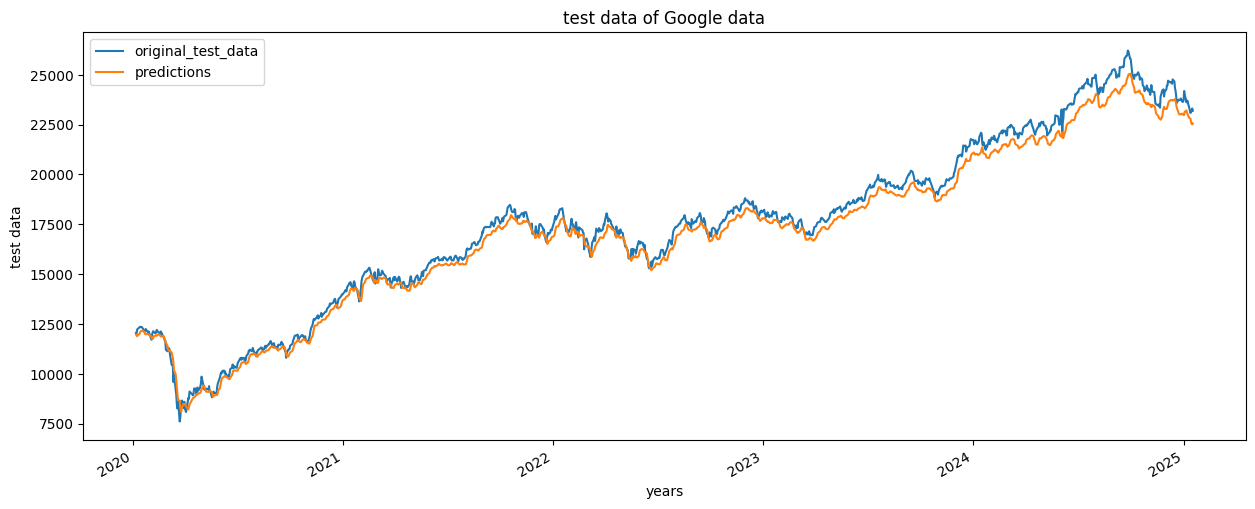

<Figure size 640x480 with 0 Axes>

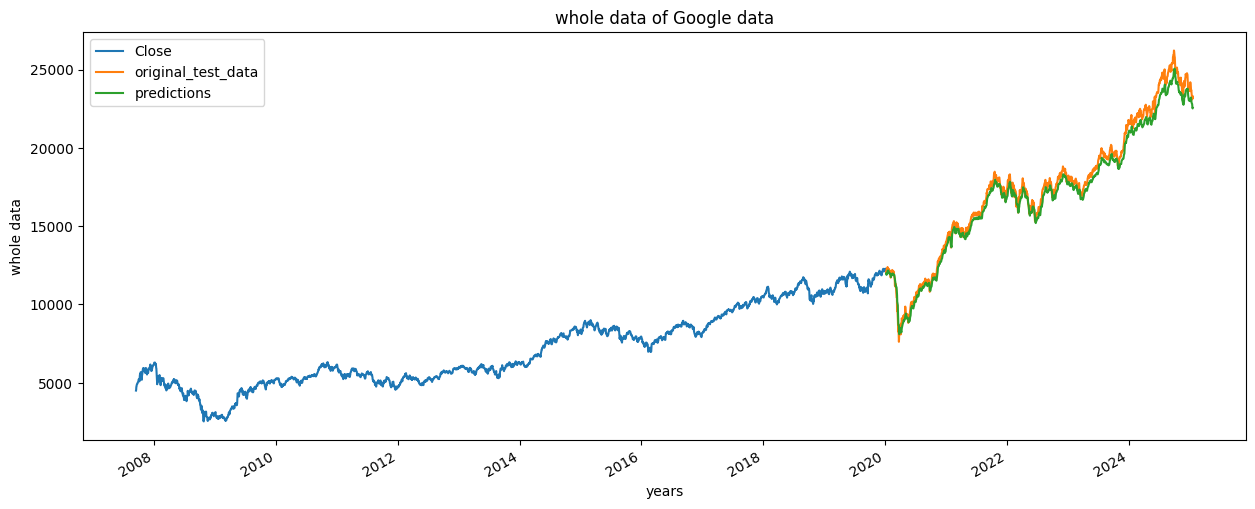

In [6]:
# pip install yfinance
import yfinance as yf
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

# Download data
end = datetime(2025,1, 20)
start = datetime(end.year-20, end.month, end.day)
stock = "^NSEI"
google_data = yf.download(stock, start, end)

# Rename columns for easier access
google_data.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Plot the closing price
plt.figure(figsize = (15,5))
plt.xlabel("years")
plt.ylabel("Close")
plt.title("Closing price of Google data")

def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

# Plot all columns
for column in google_data.columns:
    plot_graph((15,5), google_data[column], column)

# Moving Average for 5 days
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data['MA'] = data.rolling(5).mean()
print(data)

# Count occurrences of each year
for i in range(2004, 2025):
    print(i, list(google_data.index.year).count(i))

# Calculate Moving Averages
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()

# Plot the moving averages
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')
plot_graph((15,5), google_data[['Close', 'MA_for_250_days']], 'MA_for_250_days')
plot_graph((15,5), google_data[['Close', 'MA_for_100_days']], 'MA_for_100_days')
plot_graph((15,5), google_data[['Close', 'MA_for_100_days', 'MA_for_250_days']], 'MA')

# Calculate percentage change
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

# Scaling data
Adj_close_price = google_data[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Adj_close_price)

x_data = []
y_data = []

# Prepare data for training
for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)

# Split data into training and testing sets
splitting_len = int(len(x_data) * 0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]
x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=2)
model.summary()

# Predict on the test set
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

# Calculate RMSE
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))
print(f"RMSE: {rmse}")

# Prepare data for plotting
ploting_data = pd.DataFrame({
    'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
}, index=google_data.index[splitting_len + 100:])

# Plot test data and predictions
plot_graph((15,6), ploting_data, 'test data')

# Plot the whole data including predictions
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len + 100], ploting_data], axis=0), 'whole data')

# Save the model
model.save("Latest_stock_price_model.keras")


In [17]:
import numpy as np
import pandas as pd
import yfinance as yf  # To fetch stock data
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from datetime import datetime

# Load the saved model
model = load_model(r'/content/Latest_stock_price_model.keras')

# Define function to fetch data for the stock ticker
def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Input the stock ticker symbol
ticker = input("Enter the stock ticker (e.g., 'GOOGL' for Google): ")

# Correct current date in proper format
current_date = datetime.now().strftime("%Y-%m-%d")
end_date="2025-01-21"

# Fetch the latest data (for example, for the past 200 days)
stock_data = fetch_stock_data(ticker, start_date="2024-01-01", end_date="2025-01-21")

# Check if data is empty
if stock_data.empty:
    print(f"Error: No data found for ticker {ticker}. Please check the ticker symbol and try again.")
else:
    # Extract 'Close' prices
    google_data = stock_data[['Close']]

    # Scale the data using the same scaler used during training (you need to have the scaler trained before)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(google_data)

    # Extract the most recent 100 data points
    latest_data = google_data['Close'][-100:].values
    latest_data = latest_data.reshape(-1, 1)

    # Scale the data using the same scaler used for training
    scaled_latest_data = scaler.transform(latest_data)

    # Prepare the data for prediction (reshape into the appropriate input format for the model)
    x_latest_data = []
    x_latest_data.append(scaled_latest_data)
    x_latest_data = np.array(x_latest_data)

    # Predict using the trained model
    predicted_scaled_price = model.predict(x_latest_data)

    # Inverse scale the predicted price
    predicted_price = scaler.inverse_transform(predicted_scaled_price)

    # Print the predicted price for the given stock ticker
    print(f"Predicted price for {ticker} on {end_date}: {predicted_price[0][0]}")


Enter the stock ticker (e.g., 'GOOGL' for Google): ^NSEI


[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
Predicted price for ^NSEI on 2025-01-21: 23283.947265625
